# Name: Sanvika Dakhale

# Batch: B1

# Roll no: 18

###  **SIFT Feature Detection and Matching**

This section implements the **SIFT (Scale-Invariant Feature Transform)** algorithm to detect and match keypoints between two input images.  
The steps followed include:

- Loading two images: a **train image** (reference) and a **query image** (scene).
- Converting the images to **grayscale**.
- Using the `cv2.SIFT_create()` method to detect **keypoints** and compute **descriptors**.
- Matching the descriptors using **Brute-Force Matching** with L2 norm.
- Sorting matches based on distance and visualizing the **top 50 matched keypoints**.
- Finally, drawing the matches using `cv2.drawMatches()` and displaying the result using `matplotlib`.

This demonstrates the power of SIFT in recognizing objects under changes in scale, rotation, and illumination.


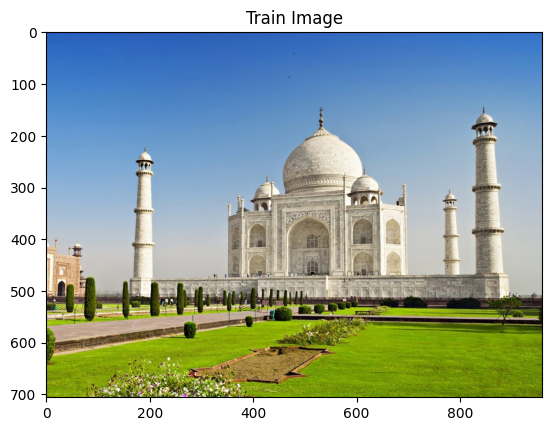

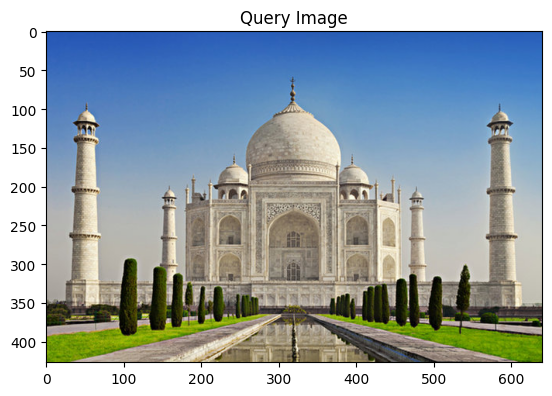

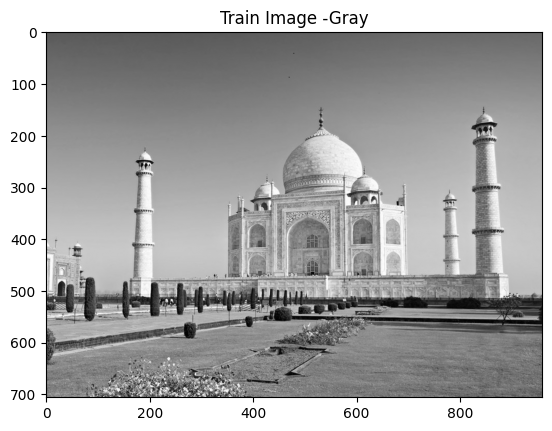

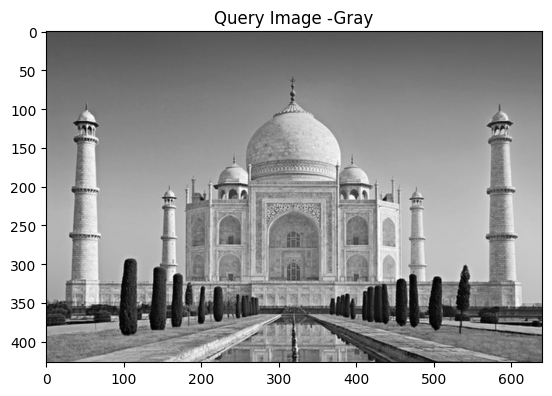

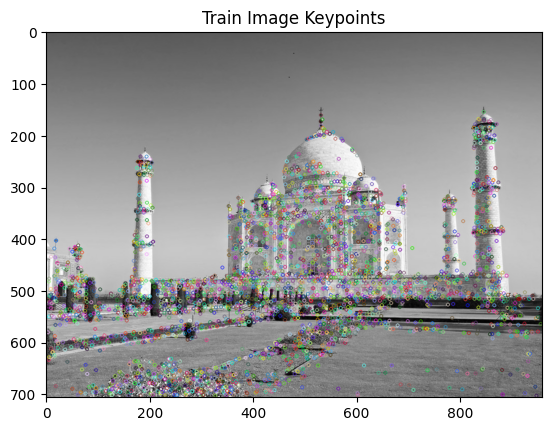

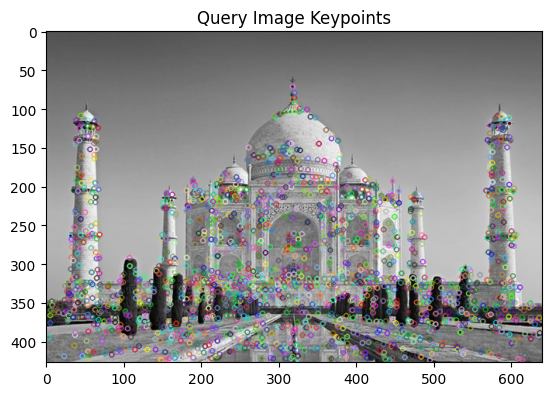

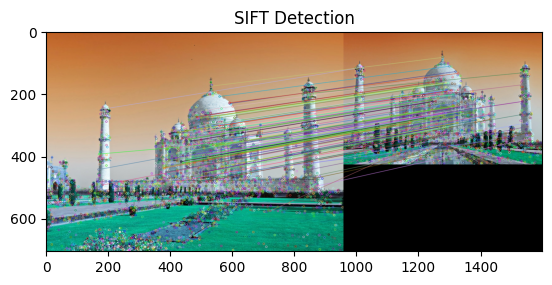

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

train_img = cv2.imread('/content/train.jpg')
query_img = cv2.imread('/content/query.jpg')

# Show Images
plt.figure(1)
plt.imshow(cv2.cvtColor(train_img, cv2.CV_32S))
plt.title('Train Image')

plt.figure(2)
plt.imshow(cv2.cvtColor(query_img, cv2.CV_32S))
plt.title('Query Image')

# Turn Images to grayscale
def to_gray(color_img):
    gray = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
    return gray

train_img_gray = to_gray(train_img)
query_img_gray = to_gray(query_img)

plt.figure(3)
plt.imshow(train_img_gray, cmap='gray')
plt.title('Train Image -Gray')
plt.figure(4)
plt.imshow(query_img_gray, cmap= 'gray')
plt.title('Query Image -Gray')

# Initialise SIFT detector
sift = cv2.SIFT_create()

# Generate SIFT keypoints and descriptors
train_kp, train_desc = sift.detectAndCompute(train_img_gray, None)
query_kp, query_desc = sift.detectAndCompute(query_img_gray, None)

plt.figure(5)
plt.imshow((cv2.drawKeypoints(train_img_gray, train_kp, train_img.copy())))
plt.title('Train Image Keypoints')

plt.figure(6)
plt.imshow((cv2.drawKeypoints(query_img_gray, query_kp, query_img.copy())))
plt.title('Query Image Keypoints')


# create a BFMatcher object which will match up the SIFT features
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(train_desc, query_desc)

# Sort the matches in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# draw the top N matches
N_MATCHES = 100

match_img = cv2.drawMatches(
    train_img, train_kp,
    query_img, query_kp,
    matches[:N_MATCHES], query_img.copy(), flags=0)

plt.figure(7)
plt.imshow(match_img)
plt.title('SIFT Detection')
plt.show()

###  **Harris Corner Detection**
This task involves applying the Harris Corner Detection algorithm to detect and highlight corner points in a grayscale image.

The steps include:

- Converting the input image to grayscale.
- Using `cv2.cornerHarris()` to compute corner responses.
- Enhancing and thresholding the corner points to identify strong corners.
- Marking the detected corners (e.g., in red) on the original image.
- Displaying the final result with Matplotlib.

This helps to identify points in the image where the intensity changes sharply in multiple directions, indicating corners.


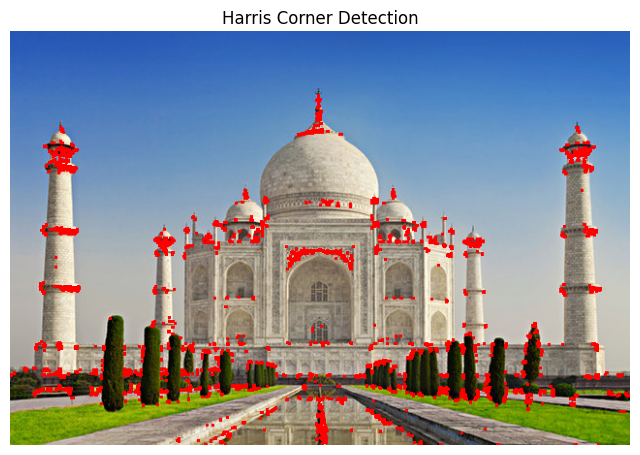

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your image and convert to grayscale
img = cv2.imread('/content/query.jpg')  # Replace with your image path
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Convert to float32 for Harris corner detection
gray = np.float32(gray)

# Detect corners
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# Dilate corner image to enhance corner points
dst_dilated = cv2.dilate(dst, None)

# Threshold for an optimal value, it may vary depending on the image
img[dst_dilated > 0.01 * dst_dilated.max()] = [0, 0, 255]  # Mark corners in red

# Display the image
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()


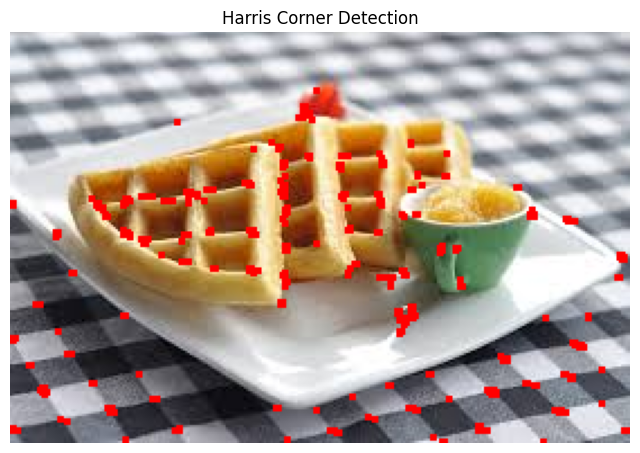

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your image and convert to grayscale
img = cv2.imread('/content/waffle.jpg')  # Replace with your image path
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Convert to float32 for Harris corner detection
gray = np.float32(gray)

# Detect corners
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# Dilate corner image to enhance corner points
dst_dilated = cv2.dilate(dst, None)

# Threshold for an optimal value, it may vary depending on the image
img[dst_dilated > 0.03 * dst_dilated.max()] = [0, 0, 255]  # Mark corners in red

# Display the image
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()


### **Shi-Tomasi Corner Detection**

This section implements the Shi-Tomasi algorithm to detect and visualize corners in an image.

The steps followed include:

- Loading the image and converting it to grayscale.
- Applying `cv2.goodFeaturesToTrack()` to detect good corner points.
- Drawing the detected corners using green circles.
- Displaying the result using Matplotlib.

Shi-Tomasi is an improvement over Harris Corner Detection and selects the most reliable corners based on quality.


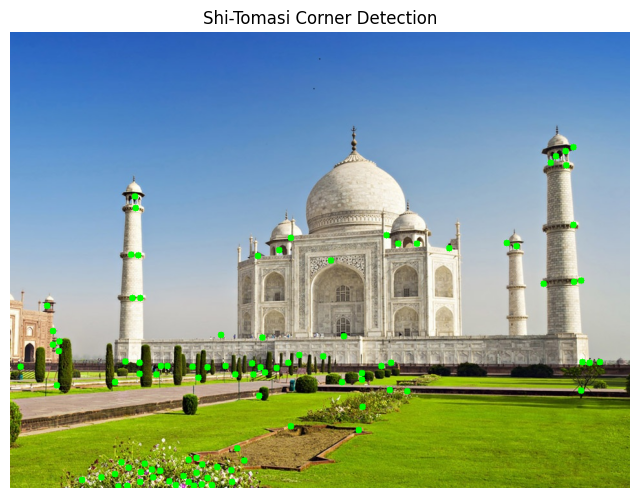

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert to grayscale
img = cv2.imread('/content/train.jpg')  # Replace with your image path
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Shi-Tomasi Corner Detection
corners = cv2.goodFeaturesToTrack(
    gray,
    maxCorners=100,
    qualityLevel=0.01,
    minDistance=10
)

# Convert corners to integer type
corners = corners.astype(int)

# Draw detected corners
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(img, (x, y), 5, (0, 255, 0), -1)  # green circles

# Display the result
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Shi-Tomasi Corner Detection")
plt.axis("off")
plt.show()


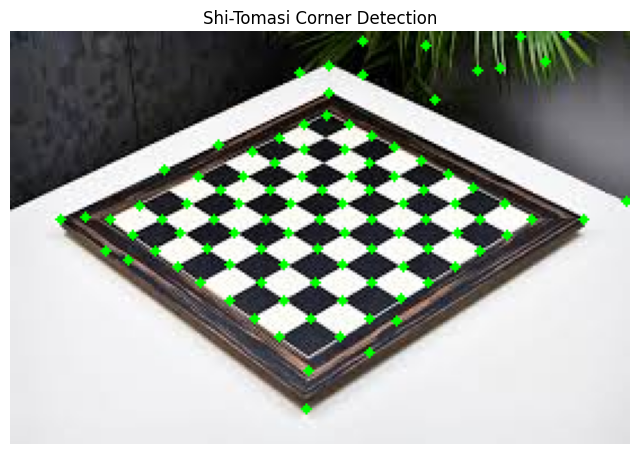

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert to grayscale
img = cv2.imread('/content/chess.jpeg')  # Replace with your image path
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Shi-Tomasi Corner Detection
corners = cv2.goodFeaturesToTrack(
    gray,
    maxCorners=100,
    qualityLevel=0.01,
    minDistance=10
)

# Convert corners to integer type
corners = corners.astype(int)

# Draw detected corners
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(img, (x, y), 2, (0, 255, 0), -1)  # green circles

# Display the result
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Shi-Tomasi Corner Detection")
plt.axis("off")
plt.show()
